# Activity analysis
![activities](data/activities.jpeg)

## Outline
- Objective (key question)
- Setup
- Get data
- Data exploration
  - Standard analysis
- Base table creation
  - Clean data
  - Feature engineering 
- Model
- Model evaluation
- Communicate results (conclusion) 

---
Key Questions answered in the objective:
1. Who are the customers?
- Why are they buying our product?
- How do we predict if a customer is going to buy our product?
- What is different from segments who are performing well and those that are performing below expectations?
- How much money will we lose if we don’t actively sell the product to these groups?


## Objective
(1) The goal of the project is to support and assist the time trackers and habit formers (customer) on their journey to save time and spend it more wisely. (2) This will push the customer to strengthen habits and identify bad habits and time-burning activities to get rid of. 

(3) By early feature testing we can measure the acceptance of the feature based on ratings changes. 

(4) At time of writing the feature is not available and early experiments with recommendations based on the past 3-4 weeks were misleading. 

(5) The app [SaveMyTime](http://savemytime.co/en/) could loose their total customer base if the feature would be used by their competititors, due to the convenient support of time saving and automated guidance.

We will create the feature by analyzing activity data from [SaveMyTime](http://savemytime.co/en/) and build a recommendation engine.
We will support users to form habits and get deeper insights into their daily habits. Predicting an activity is established at given time based on the past results.

For this we will find out:
1. total time spend on categories 
- average time spend on categories
- the total time spend on activities
- average time spend on activities
- which activities have the highest occurences
- which activities have the highest time spend on
(- what is the mean, median, standard deviation of ???)




---
# Setup

In [1]:
# dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns

import missingno as msno

# Get data

In [2]:
df = pd.read_csv('data/activities.csv')

# Data Exploration
## Standard analysis

In [3]:
df.shape

(3386, 8)

In [4]:
df.dtypes

activityName              object
activityCategoryName      object
activityStartDate [ms]     int64
activityStartDate         object
activityEndDate [ms]       int64
activityEndDate           object
activityDuration [ms]      int64
activityDuration          object
dtype: object

In [5]:
df.head(10)

,activityName,activityCategoryName,activityStartDate [ms],activityStartDate,activityEndDate [ms],activityEndDate,activityDuration [ms],activityDuration
0,Trello,Personal Adjusting,1540159273005,Mon Oct 22 00:01:13 GMT+02:00 2018,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,596554,9 min
1,Series / Docu,Entertainment,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,2950509,49 min
2,Sleep,Refresh,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,26637950,7 h 23 min
3,Moving - youtube,Transport,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,491019,8 min
4,Trello,Personal Adjusting,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,1540190444165,Mon Oct 22 08:40:44 GMT+02:00 2018,495128,8 min
5,Moving - youtube,Transport,1540190444165,Mon Oct 22 08:40:44 GMT+02:00 2018,1540190532145,Mon Oct 22 08:42:12 GMT+02:00 2018,87980,1 min
6,Clean,Personal Hygiene,1540190532145,Mon Oct 22 08:42:12 GMT+02:00 2018,1540191903726,Mon Oct 22 09:05:03 GMT+02:00 2018,1371581,22 min
7,Food,Feeding,1540191903726,Mon Oct 22 09:05:03 GMT+02:00 2018,1540193553126,Mon Oct 22 09:32:33 GMT+02:00 2018,1649400,27 min
8,Moving - youtube,Transport,1540193553126,Mon Oct 22 09:32:33 GMT+02:00 2018,1540194820783,Mon Oct 22 09:53:40 GMT+02:00 2018,1267657,21 min
9,Moving - youtube,Transport,1540194820783,Mon Oct 22 09:53:40 GMT+02:00 2018,1540195000783,Mon Oct 22 09:56:40 GMT+02:00 2018,180000,3 min


In [6]:
df.tail(10)

,activityName,activityCategoryName,activityStartDate [ms],activityStartDate,activityEndDate [ms],activityEndDate,activityDuration [ms],activityDuration
3376,Clean,Personal Hygiene,1551212884109,Tue Feb 26 21:28:04 GMT+01:00 2019,1551214324109,Tue Feb 26 21:52:04 GMT+01:00 2019,1440000,24 min
3377,Social - girl,Social - Persist,1551214324109,Tue Feb 26 21:52:04 GMT+01:00 2019,1551215764109,Tue Feb 26 22:16:04 GMT+01:00 2019,1440000,24 min
3378,Sleep,Refresh,1551215764109,Tue Feb 26 22:16:04 GMT+01:00 2019,1551249146378,Wed Feb 27 07:32:26 GMT+01:00 2019,33382269,9 h 16 min
3379,Food - Prepare,Feeding,1551249146378,Wed Feb 27 07:32:26 GMT+01:00 2019,1551250286378,Wed Feb 27 07:51:26 GMT+01:00 2019,1140000,19 min
3380,Food,Feeding,1551250286378,Wed Feb 27 07:51:26 GMT+01:00 2019,1551251227367,Wed Feb 27 08:07:07 GMT+01:00 2019,940989,15 min
3381,Learning - Language,Learning,1551251227367,Wed Feb 27 08:07:07 GMT+01:00 2019,1551252667367,Wed Feb 27 08:31:07 GMT+01:00 2019,1440000,24 min
3382,Social - girl,Social - Persist,1551252667367,Wed Feb 27 08:31:07 GMT+01:00 2019,1551254587367,Wed Feb 27 09:03:07 GMT+01:00 2019,1920000,32 min
3383,Learning - Language,Learning,1551254587367,Wed Feb 27 09:03:07 GMT+01:00 2019,1551255533154,Wed Feb 27 09:18:53 GMT+01:00 2019,945787,15 min
3384,Sport,Sport,1551255533154,Wed Feb 27 09:18:53 GMT+01:00 2019,1551256313154,Wed Feb 27 09:31:53 GMT+01:00 2019,780000,13 min
3385,Clean,Personal Hygiene,1551256313154,Wed Feb 27 09:31:53 GMT+01:00 2019,1551257046239,Wed Feb 27 09:44:06 GMT+01:00 2019,733085,12 min


### Conclusion: Data exploration
The data consists of a few columns for activity and category and timestamps

# Base table creation
Goal is to create a cleaned data, selected features and augmented table.

## Clean data
### Identify missing data

In [14]:
df.isnull().sum()

activityName              0
activityCategoryName      0
activityStartDate [ms]    0
activityStartDate         0
activityEndDate [ms]      0
activityEndDate           0
activityDuration [ms]     0
activityDuration          0
dtype: int64

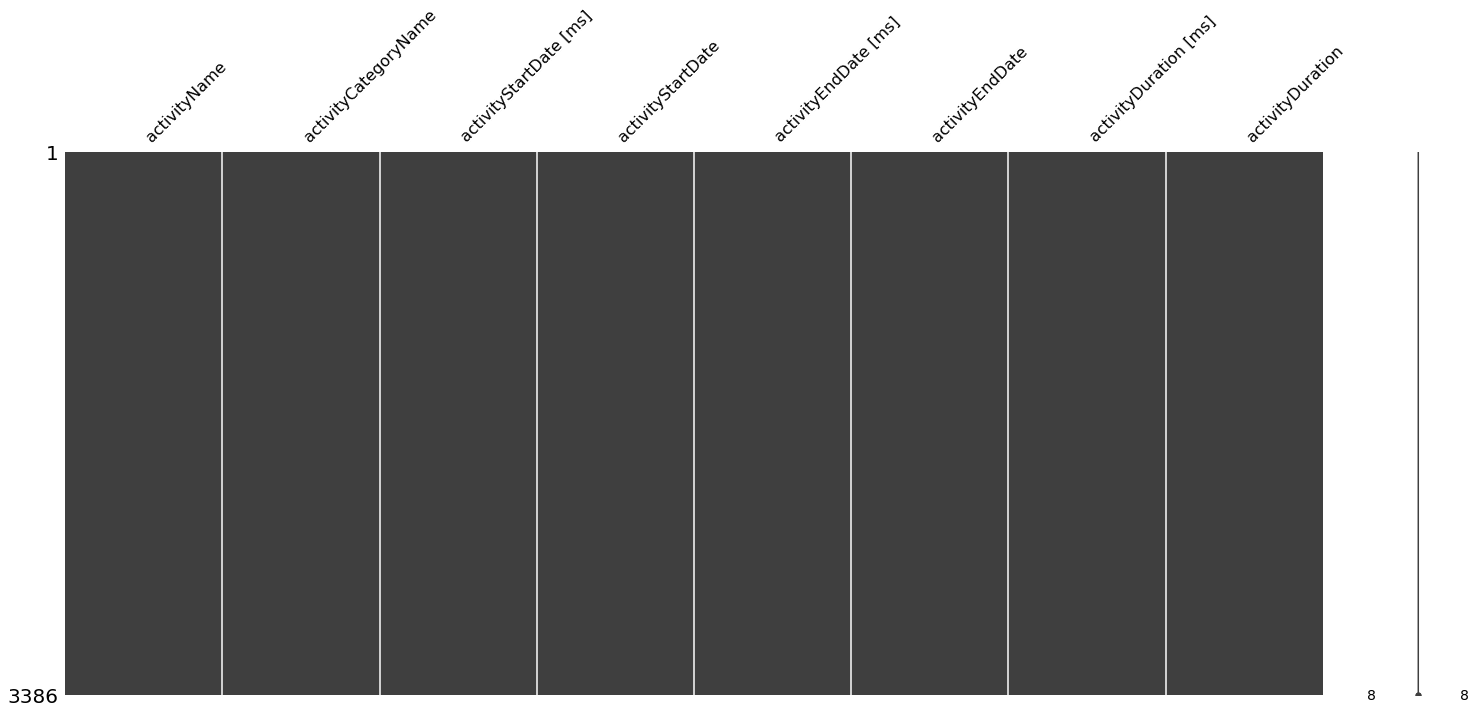

In [15]:
# Nice visualization
msno.matrix(df) 

### Conclusion: Clean Data
No missing values are found in the data. No filling of missing values is necessary. 

## Feature engineering 

Let's take only relevant features into our base table:
- activity, 
- category, 
- start_date_timestamp, 
- start_date,
- end_date_timestamp,
- end_date,
- activity_duration[m]   # minutes

In [16]:
base_table = pd.DataFrame()
base_table['activity'] = df['activityName']
base_table['category'] = df['activityCategoryName']
base_table['start_date[ms]'] = df['activityStartDate [ms]']
base_table['start_date'] = df['activityStartDate']
base_table['end_date[ms]'] = df['activityEndDate [ms]']
base_table['end_date'] = df['activityEndDate']

Lets transform activitiy duration in minutes. Because minutes is a more relevant metric than milliseconds for our activitiy analysis.

In [17]:
ms_to_m = 1000 * 60 #milli seconds to minutes
base_table['activityDuration[m]'] = df['activityDuration [ms]'] / ms_to_m
# cast to int (not needed now - we loose here just information)
# base_table['activityDuration[m]'] = base_table['activityDuration[m]'].astype(int)

In [18]:
base_table.dtypes

activity                object
category                object
start_date[ms]           int64
start_date              object
end_date[ms]             int64
end_date                object
activityDuration[m]    float64
dtype: object

In [19]:
base_table.head()

,activity,category,start_date[ms],start_date,end_date[ms],end_date,activityDuration[m]
0,Trello,Personal Adjusting,1540159273005,Mon Oct 22 00:01:13 GMT+02:00 2018,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,9.942567
1,Series / Docu,Entertainment,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,49.175150
2,Sleep,Refresh,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,443.965833
3,Moving - youtube,Transport,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,8.183650
4,Trello,Personal Adjusting,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,1540190444165,Mon Oct 22 08:40:44 GMT+02:00 2018,8.252133


### Distributions of numeric features

Lets plot a histogram of activity duration (numeric feature) to see the distribution of time spend on activities. 

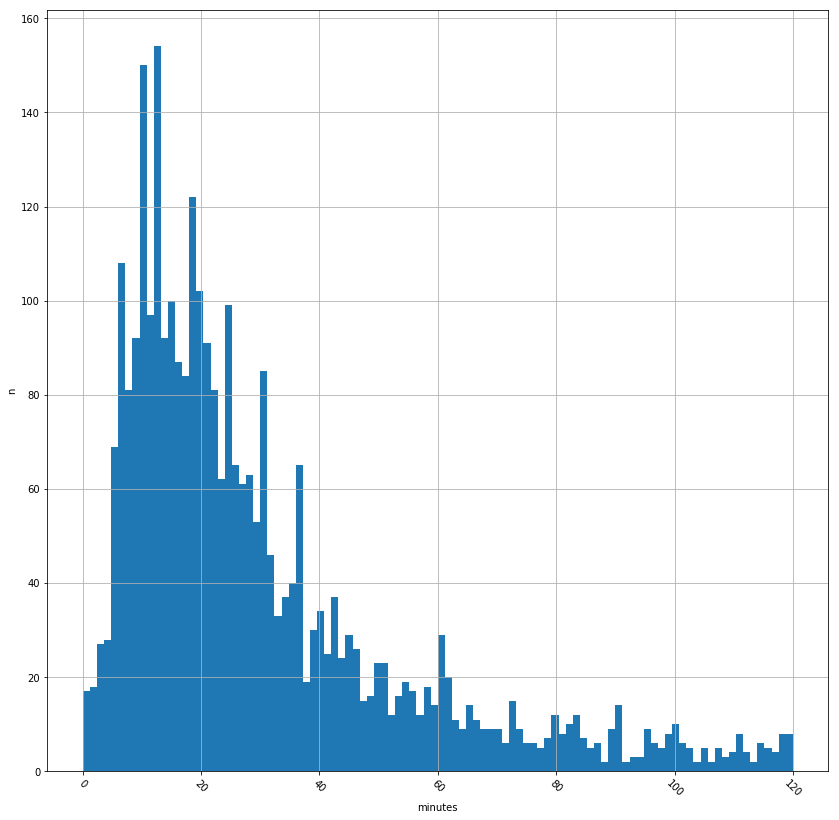

In [11]:
axes = base_table['activityDuration[m]'].hist(xrot=-45, figsize=(14,14),
                                       bins=100, range=(0,120))
axes.set_xlabel("minutes")
axes.set_ylabel("n")
plt.show()

# Model

# Model evaluation

# Communicate results (conclusion) 